# Boltzmann Lattice (Fluid flow)

## Simulation setup & execution

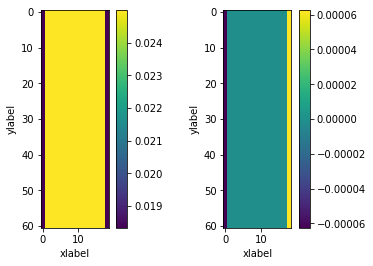

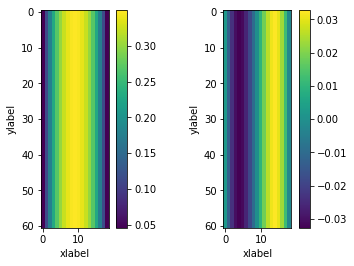

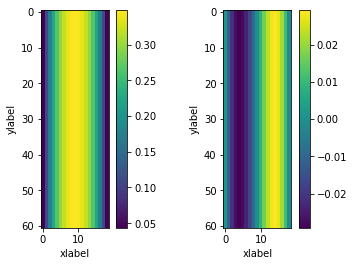

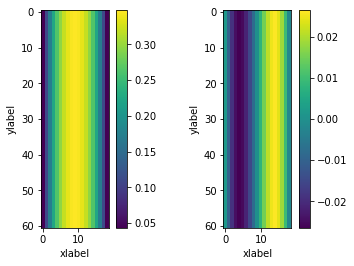

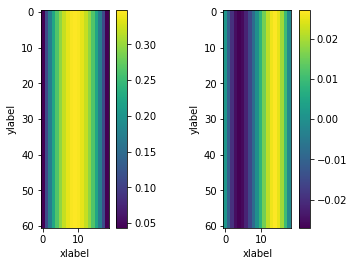

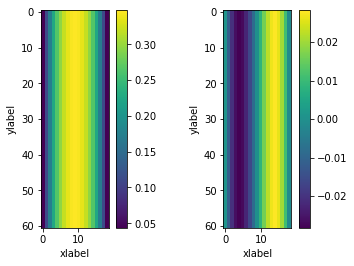

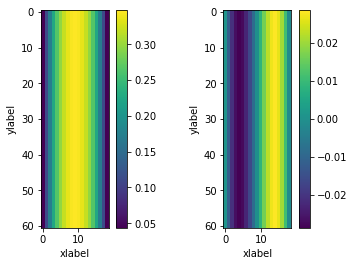

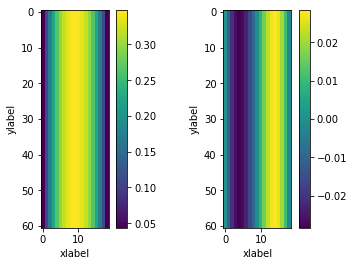

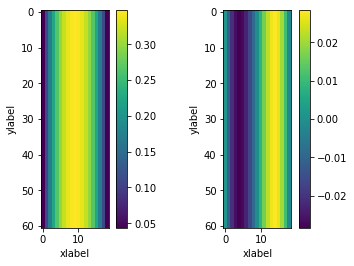

Equilibrium has been reached after 393 iterations.


In [39]:
import time as tm
from types import SimpleNamespace
from Boltzmann_simulation import *

start_time = tm.time()

# Create name space
sim = SimpleNamespace()

# Assign system dimensions/parameters
sim.L, sim.W = 60, 20
sim.m = 1
sim.P = 1
sim.epsilon = 0.0001
sim.max_iterations = 1000
sim.nu = 1

# Resolutions
sim.res = 1 # Space resolution
sim.dt = 1 # Time resolution

# Grid constants
sim.L_in, sim.W_in = int(sim.L/sim.res), int(sim.W/sim.res)  
sim.L_n,  sim.W_n  = sim.L_in + 1, sim.W_in + 1

# Weights and direction vectors
sim.w = np.array([4, 1/4, 1, 1/4, 1, 1/4, 1, 1/4, 1])/9
sim.e = np.array([[0,0], [1,0], [1,1], [0,1], [-1,1], [-1,0], [-1,-1], [0,-1], [1,-1]])
sim.e_norm = np.sum(abs(sim.e), axis = 1)
sim.bounch = np.array([[1,5], [2,6], [3,7], [4,8]])

sim.c = sim.res/sim.dt 
sim.dv = 0.01
sim.tau = (6*(sim.nu*(sim.dt/sim.res)**2) + 1)/2 # Relaxation time

# Actual simulation
par = boltzmann_sim(sim)

end_time = tm.time()
total_time = end_time - start_time
#results.sim_time = total_time

In [74]:
sim.c

1.0

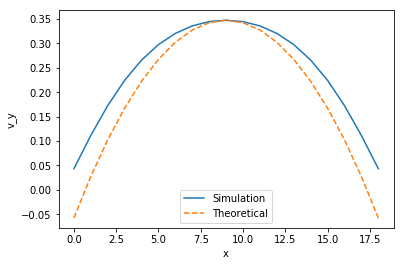

In [41]:
# Theoretical values (60*20, nu = 2, dv = 0.01)
data_slice = par.u[0,1:sim.W_in,0]
plt.plot(data_slice, label = 'Simulation')

x = np.linspace(0, len(data_slice) - 1, len(data_slice))
y = -sim.dv/(2*sim.nu)*(x-(len(data_slice) - 1)/2)**2 + max(data_slice)
plt.plot(x, y, '--', label = 'Theoretical')
plt.xlabel('x')
plt.ylabel('v_y')
plt.legend()
plt.show()

# To Do

- Implement intial densities  (now just set to 0), make sure that upper and lower boundary are set to 0.
- Implement pressure gradient (hence for in x direction) (In forcing function)
- for loop in velocity determinations needs to be replaced by other less time consuming mechanism
- In BC np.argwhere niet gebruiken
- Namespace for results (needed for data processing)
- Add movie